In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Lista 2.
## Zadanie 5.

<i>Korzystając ze wzorów na wielomiany interpolacyjne Lagrange’a i Newtona, znaleźć 
trójmian kwadratowy $p_2\left(x\right)$ interpolujący funkcje $f\left(x\right) = \cos x$ w&nbsp;węzłach $x_0 = 0,
x_1 = \frac{\pi}{4}, x_2 = \frac{\pi}{2}$. Sporządzić wykres funkcji $f\left(x\right)$ i trójmianu $p_2\left(x\right)$. 
Na osobnym rysunku sporządzić wykres $$g\left(x\right) = \left|f \left(x\right) − p_2\left(x\right)\right|,\quad x \in \left[0, \frac{\pi}{2}\right].$$ 
Porównać teoretyczne oszacowanie błędu interpolacji z wartościami odczytanymi z wykresu $g\left(x\right)$.</i>

## Wykorzystano następujące twierdzenia i definicje:

### Twierdzenie o istnieniu i jednoznaczności wielomianu interpolacyjnego
Niech dany będzie zbiór $n + 1$ punktów $\left(x_0, y_0\right), \left(x_1, y_1\right), \dots, \left(x_n, y_n\right) \in R^2$. Wówczas
istnieje dokładnie jeden wielomian $p_n\left(x\right)$ stopnia $n$, taki że $p_n\left(x_i\right) = y_i$ dla $i = 0, \dots, n.$

### Twierdzenie Rolle'a
Niech $f \in C\left(\left[a, b\right]\right)$ oraz $f \in C^1\left(\left(a, b\right)\right).$ Wówczas jeśli $f\left(a\right) = f\left(b\right)$, to istnieje taki punkt $c \in\left(a, b\right),$ że $f'\left(c\right) = 0.$

### Twierdzenie o błędzie interpolacji
Niech $f \in C^{n+1}\left(\left[a, b\right]\right)$ i niech $p_n\left(x\right)$ będzie wielomianem interpolacyjnym stopnia $n$-tego spełniającym warunki interpolacji w węzłach $a \leq x_0 < x_1 < \cdots < x_n \leq b.$ Wtedy istnieje $\xi_x\in\left(a, b\right)$ taki, że
$$f\left(x\right)-p_n\left(x\right)=\frac{1}{\left(n+1\right)!}f^\left(n+1\right)\left(\xi_x\right)\prod\limits_{i=0}^n\left(x-x_i\right).$$

### Iloraz różnicowy
$$f\left[x_i\right]:=y_i$$

$$f\left[x_i, x_{i+1},\dots,x_{i+j}\right]:=\frac{f\left[x_{i+1}, x_{i+1},\dots,x_{i+j}\right]-f\left[x_i, x_{i+1},\dots,x_{i+j-1}\right]}{x_{i+j}-x_i}$$

### Wielomian interpolacyjny Lagrange'a
$$ p_n\left(x\right)=\sum\limits_{i=0}^{n}y_il_i\left(x\right),$$
gdzie wielomiany $l_i\left(x\right)$ są dane wzorem
$$l_i\left(x\right):=\prod\limits_{j=0,j\neq i}^{n}\frac{x-x_j}{x_i-x_j}.$$

### Wielomian interpolacyjny Newtona
$$p_n\left(x\right)=\sum\limits_{j=0}^{n}c_jq_j\left(x\right),$$
gdzie: 
* $\left\{q_0\left(x\right), q_1\left(x\right), q_2\left(x\right), \dots,q_n\left(x\right)\right\}$ stanowi bazę, 
* $q_0\left(x\right)\equiv 1, q_j\left(x\right)=\prod\limits_{i=0}^{j-1}\left(x-x_i\right)\,\,\mathrm{dla}\,\,j=1,\dots,n,$
* $c_j, \,\,j=0,\dots,n$ są współczynnikami, które należy wyznaczyć, korzystając z warunków interpolacji $$p_n\left(x\right)=\sum\limits_{j=0}^{n}c_jq_j\left(x_i\right)=y_i, \quad \mathrm{dla}\,\,i=0,\dots,n.$$ 


Wiadomo, że istnieje dokładnie jeden wielomian $p_2\left(x\right)$ stopnia $2$, taki że $p_2\left(x_i\right) = y_i$ dla $i = 0,1,2$ (tw. o istnieniu i jednoznaczności wielomianu interpolacyjnego), zatem z obu wzorów powinniśmy otrzymać takie same wyniki.

## Wielomian interpolacyjny Lagrange'a:

In [18]:
def lagrange(x,xi,func):
    yi = func(xi)
    p = 0
    for j in range(len(xi)):
        temp = yi[j]
        for k in range(len(xi)):
            if j!=k:
                temp *= (x-xi[k])/(xi[j]-xi[k])
        p += temp
    return p

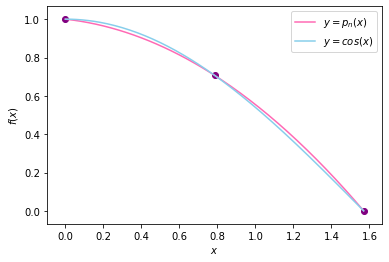

In [31]:
x = np.arange(0,np.pi/2,0.01)
data = lagrange(x,[0,np.pi/4,np.pi/2],np.cos)
plt.plot(x,data, color='hotpink', label='$y=p_n(x)$')
plt.plot(x,np.cos(x), color='skyblue', label='$y=cos(x)$')
plt.scatter([0,np.pi/4,np.pi/2],[1,np.sqrt(2)/2,0], color='purple')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

Wiadomo, że $x_0=0, x_1=\frac{\pi}{4}, x_2=\frac{\pi}{2}.$ Wyliczono:

$$f\left(x_0\right)=\cos 0 = 1=y_0,$$

$$f\left(x_1\right)=\cos \frac{\pi}{4} = \frac{\sqrt{2}}{2}=y_1,$$

$$f\left(x_1\right)=\cos \frac{\pi}{2} = 0=y_2.$$

Na podstawie wzoru na wielomian interpolacyjny Lagrange'a wyznaczono
\begin{aligned}
p_2\left(x\right)&=\sum\limits_{i=0}^{2}y_il_i\left(x\right)=y_0\cdot\frac{x-x_1}{x_0-x_1}\cdot\frac{x-x_2}{x_0-x_2}+y_1\cdot\frac{x-x_0}{x_1-x_0}\cdot\frac{x-x_2}{x_1-x_2}+y_2\cdot\frac{x-x_0}{x_2-x_0}\cdot\frac{x-x_1}{x_2-x_1}\\
&= 1\cdot\frac{x-\frac{\pi}{4}}{0-\frac{\pi}{4}}\cdot\frac{x-\frac{\pi}{2}}{0-\frac{\pi}{2}}+\frac{\sqrt{2}}{2}\cdot\frac{x-0}{\frac{\pi}{4}-0}\cdot\frac{x-\frac{\pi}{2}}{\frac{\pi}{4}-\frac{\pi}{2}}+0\cdot\frac{x-0}{\frac{\pi}{2}-0}\cdot\frac{x-\frac{\pi}{4}}{\frac{\pi}{2}-\frac{\pi}{4}}\\
&=\frac{\left(x-\frac{\pi}{4}\right)\left(x-\frac{\pi}{2}\right)}{\frac{\pi^2}{8}}-\frac{x\sqrt{2}\left(x-\frac{\pi}{2}\right)}{2\cdot\frac{\pi^2}{16}}\\
&=\frac{8}{\pi^2}\left[x^2+\frac{\pi^2}{8}-\frac{3\pi}{4}x-x^2\sqrt{2}+\frac{\pi\sqrt{2}}{2}x\right]\\
&=\frac{8-8\sqrt{2}}{\pi^2}x^2+\frac{4\sqrt{2}-6}{\pi}x+1
\end{aligned}

## Wielomian interpolacyjny Newtona:

In [3]:
def ilo_roz(xi,func):
    if len(xi)==1:
        return func(xi[0])
    return (ilo_roz(xi[1:], func)-ilo_roz(xi[:-1],func))/(xi[-1]-xi[0])

def newton(x, xi, func):
    c = []
    p=0
    for i in range(1,len(xi)+1):
        c.append(ilo_roz(xi[:i],func))
    for j in range(len(c)):
        temp = c[j]
        for k in range(j):
            temp *= (x-xi[k])
        p += temp
    return p

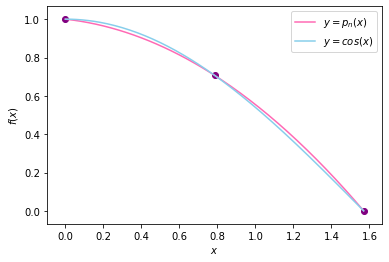

In [52]:
x = np.arange(0,np.pi/2,0.01)
data = newton(x,[0,np.pi/4,np.pi/2],np.cos)
plt.plot(x,data, color='hotpink', label='$y=p_n(x)$')
plt.plot(x,np.cos(x), color='skyblue', label='$y=cos(x)$')
plt.scatter([0,np.pi/4,np.pi/2],[1,np.sqrt(2)/2,0], color='purple')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

Tablica trójkątna ilorazów różnicowych ma postać
\begin{matrix}
x_0 & f\left[x_0\right] & f\left[x_0,x_1\right] & f\left[x_0,x_1,x_2\right]\\
x_1 & f\left[x_1\right] & f\left[x_0,x_1\right]&\\
x_2 & f\left[x_2\right] & &
\end{matrix}

Wiadomo, że $x_0=0, x_1=\frac{\pi}{4}, x_2=\frac{\pi}{2}.$
Korzystając z definicji ilorazu różnicowego obliczono

$$f\left[x_0\right]=\cos 0 = 1,$$

$$f\left[x_1\right]=\cos \frac{\pi}{4} = \frac{\sqrt{2}}{2},$$

$$f\left[x_1\right]=\cos \frac{\pi}{2} = 0,$$

$$f\left[x_0,x_1\right]=\frac{f\left[x_1\right]-f\left[x_0\right]}{x_1-x_0}=\frac{\frac{\sqrt{2}}{2}-1}{\frac{\pi}{4}-0}=\frac{2\left(\sqrt{2}-2\right)}{\pi}=\frac{2\sqrt{2}-4}{\pi},$$

$$f\left[x_1,x_2\right]=\frac{f\left[x_2\right]-f\left[x_1\right]}{x_2-x_1}=\frac{0-\frac{\sqrt{2}}{2}}{\frac{\pi}{2}-\frac{\pi}{4}}=-\frac{2\sqrt{2}}{\pi},$$

$$f\left[x_0,x_1,x_2\right]=\frac{f\left[x_1,x_2\right]-f\left[x_0,x_1\right]}{x_2-x_0}=\frac{-\frac{2\sqrt{2}}{\pi}-\frac{2\sqrt{2}-4}{\pi}}{\frac{\pi}{2}-0}=\frac{\frac{-4\sqrt{2}+4}{\pi}}{\frac{\pi}{2}}=\frac{8-8\sqrt{2}}{\pi^2}.$$

Na podstawie powyższych wyników ustalono wartości współczynników $c_j$ dla $j=0,1,2$

\begin{cases}
c_0 = f\left[x_0\right] = 1\\
c_1 = f\left[x_0,x_1\right] = \frac{2\sqrt{2}-4}{\pi}\\
c_2 = f\left[x_0,x_1,x_2\right] = \frac{8-8\sqrt{2}}{\pi^2}.
\end{cases}

Na podstawie wzoru interpolacyjnego Newtona wyznaczono
\begin{aligned}
p_2\left(x\right) &= \sum\limits_{j=0}^{2}c_jq_j\left(x\right)
=c_0q_0\left(x\right)+c_1q_1\left(x\right)+c_2q_2\left(x\right)\\
&=c_0\cdot 1+c_1\left(x-x_0\right)+c_2\left(x-x_0\right)\left(x-x_1\right)\\
&=1\cdot 1+\frac{2\sqrt{2}-4}{\pi}\left(x-0\right)+\frac{8-8\sqrt{2}}{\pi^2}\left(x-0\right)\left(x-\frac{\pi}{4}\right)\\
&=1+\frac{2\sqrt{2}-4}{\pi}x+\frac{8-8\sqrt{2}}{\pi^2}x^2-\frac{8-8\sqrt{2}}{\pi^2}\cdot\frac{\pi}{4}x\\
&=\frac{8-8\sqrt{2}}{\pi^2}x^2+x\left(\frac{2\sqrt{2}-4}{\pi}-\frac{2-2\sqrt{2}}{\pi}\right)+1\\
&=\frac{8-8\sqrt{2}}{\pi^2}x^2+\frac{4\sqrt{2}-6}{\pi}x+1
\end{aligned}

Wyniki pochodzące z obu wzorów się pokrywają, zatem są sensowne.

In [23]:
def p_2(x):
    return (8-8*np.sqrt(2))/np.pi**2*x**2+(4*np.sqrt(2)-6)/np.pi*x+1

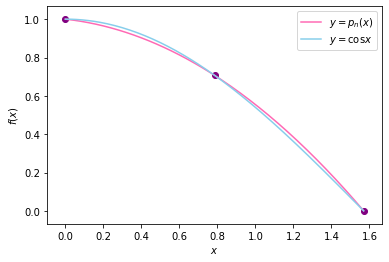

In [29]:
x = np.arange(0,np.pi/2,0.01)
y_p2 = p_2(x)
y_f = np.cos(x)
plt.plot(x,y_p2, label='$y=p_n(x)$', color='hotpink')
plt.plot(x,y_f, label='$y=\cos x$', color='skyblue')
plt.scatter([0,np.pi/4,np.pi/2],[1,np.sqrt(2)/2,0], color='purple')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

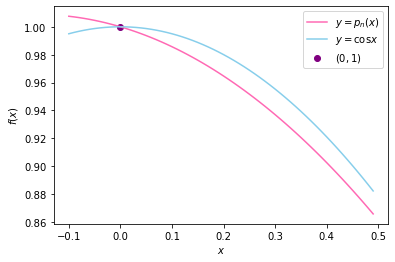

In [30]:
x = np.arange(-0.1,0.5,0.01)
y_p2 = p_2(x)
y_f = np.cos(x)
plt.plot(x,y_p2, label='$y=p_n(x)$', color='hotpink')
plt.plot(x,y_f, label='$y=\cos x$', color='skyblue')
plt.scatter([0],[1], color='purple', label='$(0,1)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

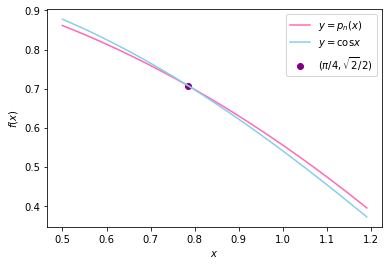

In [5]:
x = np.arange(0.5,1.2,0.01)
y_p2 = p_2(x)
y_f = np.cos(x)
plt.plot(x,y_p2, label='$y=p_n(x)$', color='hotpink')
plt.plot(x,y_f, label='$y=\cos x$', color='skyblue')
plt.scatter([np.pi/4],[np.sqrt(2)/2], color='purple', label='$(\pi/4,\sqrt{2}/2)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

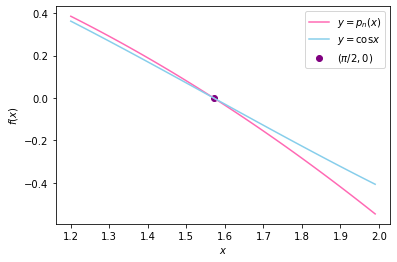

In [6]:
x = np.arange(1.2,2,0.01)
y_p2 = p_2(x)
y_f = np.cos(x)
plt.plot(x,y_p2, label='$y=p_n(x)$', color='hotpink')
plt.plot(x,y_f, label='$y=\cos x$', color='skyblue')
plt.scatter([np.pi/2],[0], color='purple', label='$(\pi/2,0)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

## Teoretyczne oszacowanie błędu interpolacji

Rozpatrzono przedział $\left[0,\frac{\pi}{2}\right].$

Z twierdzenia o błędzie interpolacji wiadomo, że 

\begin{equation}
\exists_{\xi_x\in\left(0,\frac{\pi}{2}\right)}\quad f\left(x\right)-p_2\left(x\right)=\frac{1}{\left(2+1\right)!}f^{\left(3\right)}\left(\xi_x\right)\prod\limits_{i=0}^2\left(x-x_i\right)
\implies \exists_{\xi_x\in\left(0,\frac{\pi}{2}\right)}\quad \left|f\left(x\right)-p_2\left(x\right)\right|=\left|\frac{1}{3!}f^{\left(3\right)}\left(\xi_x\right)\prod\limits_{i=0}^2\left(x-x_i\right)\right|.
\end{equation}

Wyznaczono
$$
f^{\left(3\right)}\left(x\right)=\left(\cos x\right)^{'''}=\left(-\sin x\right)^{''}=\left(-\cos x\right)^{'}=\sin x.
$$
Zauważono, że:
1. $|\frac{1}{3!}|=\frac{1}{6}$,


2. $\left|\sin x\right|\leq1$,


3. $\left|\prod\limits_{i=0}^2\left(x-x_i\right)\right|=\left|\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)\right| = \left|\left(x-0\right)\left(x-\frac{\pi}{4}\right)\left(x-\frac{\pi}{2}\right)\right|=\left|x^3-\frac{3\pi}{4}x^2+\frac{\pi^2}{8}x\right|=|h\left(x\right)|$.



Aby wyznaczyć ograniczenie (3.) należy znaleźć maksima lokalne funkcji $h\left(x\right)$ oraz jej wartości w punktach skrajnych badanego przedziału, czyli w tym przypadku $x\in\left\{0,\frac{\pi}{2}\right\}.$

In [7]:
def h_x(x):
    return x**3-3*np.pi/4*x**2+np.pi**2/8*x

In [8]:
h_x(0)

0.0

In [9]:
h_x(np.pi/2)

2.220446049250313e-16

$h\left(0\right)=0;$

$h\left(\frac{\pi}{2}\right)=0;$

$h^{'}\left(x\right)=3x^2-\frac{3\pi}{2}x+\frac{\pi^2}{8};$

$h^{'}\left(x\right)=0\iff x=\pi\left(\frac{1}{4}-\frac{1}{4\sqrt{3}}\right) \lor x=\pi\left(\frac{1}{4}+\frac{1}{4\sqrt{3}}\right);$

In [10]:
np.pi*(0.25-1/4/3**(1/2))

0.33194832233889376

In [11]:
np.pi*(0.25+1/4/3**(1/2))

1.2388480044560026

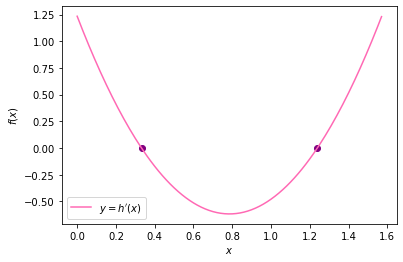

In [12]:
x = np.arange(0,np.pi/2,0.01)
y = [3*i**2-3*np.pi/2*i+np.pi**2/8 for i in x]
plt.plot(x,y, color='hotpink', label="$y=h'(x)$")
plt.scatter([np.pi*(0.25-1/4/3**(1/2)),np.pi*(0.25+1/4/3**(1/2))],[0,0],color='purple')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [13]:
h_x(np.pi*(0.25-1/4/3**(1/2)))

0.18647377279103247

In [14]:
h_x(np.pi*(0.25+1/4/3**(1/2)))

-0.1864737727910326

$h\left(\pi\left(\frac{1}{4}-\frac{1}{4\sqrt{3}}\right)\right)\approx0.186;$

$h\left(\pi\left(\frac{1}{4}+\frac{1}{4\sqrt{3}}\right)\right)\approx-0.186;$

Zatem można zauważyć, że $\left|h\left(x\right)\right|<0.187.$ Z powyższych obliczeń zapisano:
$$
\max\limits_{x\in\left[0,\frac{\pi}{2}\right]}\left|f\left(x\right)-p_2\left(x\right)\right|
=\max\limits_{x\in\left[0,\frac{\pi}{2}\right]}\left|\frac{1}{3!}f^{\left(3\right)}\left(\xi_x\right)\prod\limits_{i=0}^2\left(x-x_i\right)\right|<\frac{1}{6}\cdot 1\cdot 0.187=\frac{187}{6000}.
$$

In [15]:
187/6000

0.031166666666666665

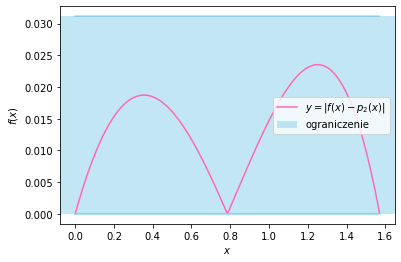

In [16]:
x = np.arange(0,np.pi/2,0.001)
y_p2 = p_2(x)
y_f = np.cos(x)
y_g = abs(y_f-y_p2)
fig, ax = plt.subplots()
ax.plot(x,y_g, color='hotpink',label='$y=|f(x)-p_2(x)|$')
ax.plot(x,[187/6000 for i in range(len(x))], color='skyblue')
ax.plot(x,[0 for i in range(len(x))], color='skyblue')
ax.axhspan(0, 187/6000, facecolor='skyblue', alpha=0.5, label='ograniczenie')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()